In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings

warnings.filterwarnings('ignore')

mnist_train_path = '../../documents/CSE291/MNIST/train.csv'
mnist_test_path = '../../documents/CSE291/MNIST/test.csv'
mnist_train_df = pd.read_csv(mnist_train_path, header=None).T
mnist_test_df = pd.read_csv(mnist_test_path, header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

In [203]:
index_0s = mnist_train_df['Class'] == 0
index_1s = mnist_train_df['Class'] == 1
index_3s = mnist_train_df['Class'] == 3
index_5s = mnist_train_df['Class'] == 5

mnist_train_0_1_df = mnist_train_df.loc[index_0s | index_1s]
mnist_train_3_5_df = mnist_train_df.loc[index_3s | index_5s]
mnist_train_1_df = mnist_train_df.loc[index_1s]
y_0_1 = mnist_train_0_1_df['Class']
y_3_5 = mnist_train_3_5_df['Class']

index_0s_test = mnist_test_df['Class'] == 0
index_1s_test = mnist_test_df['Class'] == 1
index_3s_test = mnist_test_df['Class'] == 3
index_5s_test = mnist_test_df['Class'] == 5
mnist_test_0_1_df = mnist_test_df.loc[index_0s_test | index_1s_test]
mnist_test_3_5_df = mnist_test_df.loc[index_3s_test | index_5s_test]

X_0_1_test=mnist_test_0_1_df.ix[:,:784]
y_0_1_test=mnist_test_0_1_df['Class']
X_3_5_test=mnist_test_3_5_df.ix[:,:784]
y_3_5_test=mnist_test_3_5_df['Class']
mnist_test_1_df=mnist_test_df.loc[ index_1s_test]
mnist_test_1_df.shape
X_0_1=mnist_train_0_1_df.ix[:,:784]
X_3_5=mnist_train_3_5_df.ix[:,:784]


(1902, 784)

In [303]:

#cov_mat=np.cov(X_0_1.T)
cov_mat=np.cov(X_3_5.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vecs=eig_vecs
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])    
eig_vecs.shape 

Eigenvectors 
[[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  1.+0.j]]

Eigenvalues 
[   5.9008890512803553463072603335604071617126464843750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

(784, 784)

In [304]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#the largest eigenvalue
print ('most important eigenvalue:',eig_pairs[0][0])
print ('20th eigenvalue:',eig_pairs[19][0].real)
print ('most important eigenvector:',eig_pairs[0][1])
print ('20th eigenvector:',eig_pairs[19][1].real)

('most important eigenvalue:', 5.9008890512803553)
('20th eigenvalue:', 0.51618966580362258)
('most important eigenvector:', array([   0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e+00+0.j,
         0.0000000000000000000000000000000000000000000000000000000000

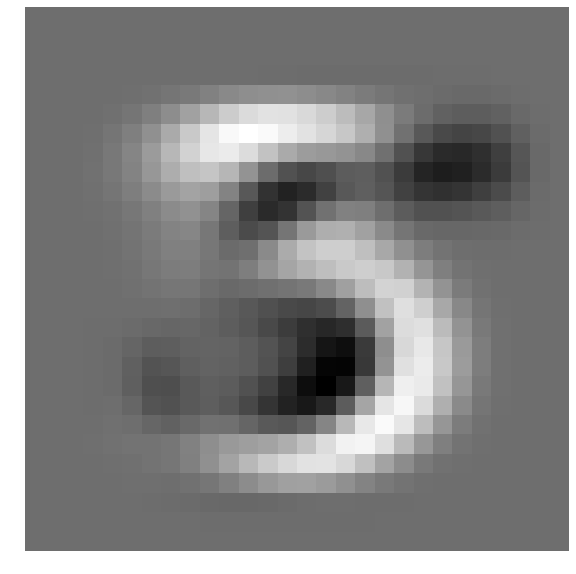

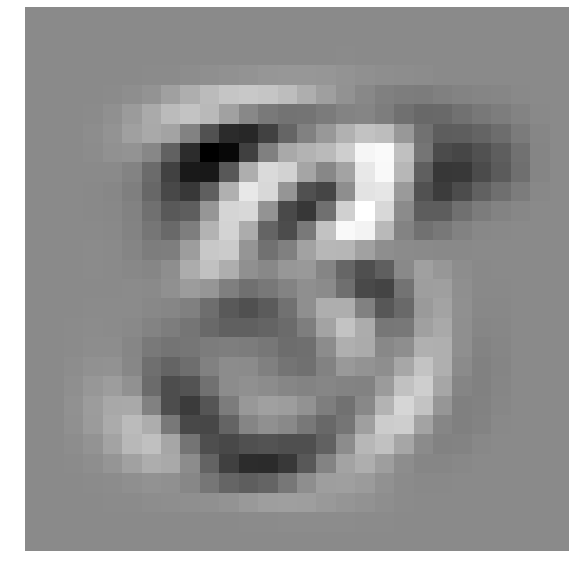

In [305]:
#plot the first and 20th eigenvector 
plt.figure(figsize=(10,10))
plt.imshow(eig_pairs[0][1].real.reshape((28, 28)).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(eig_pairs[19][1].real.reshape((28, 28)).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()


In [6]:
# choose the principle eigenvalue
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 787))

    plt.bar(range(784), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(784), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [7]:
aaa=eig_pairs[0][1]
for i in range(1,len(eig_vals)):
    aaa=np.column_stack((aaa,eig_pairs[i][1]))

pca_0_1=aaa.T

In [8]:
X_1=mnist_train_1_df.ix[:,:784]
cov_mat=np.cov(X_1.T)
#cov_mat=np.cov(X_3_5.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vecs=eig_vecs
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])    
eig_vecs.shape 

Eigenvectors 
[[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  1.+0.j]]

Eigenvalues 
[  7.87492948e+00 +0.00000000e+00j   3.25612976e+00 +0.00000000e+00j
   1.65090337e+00 +0.00000000e+00j   1.20655088e+00 +0.00000000e+00j
   9.11948343e-01 +0.00000000e+00j   6.19876247e-01 +0.00000000e+00j
   5.71775484e-01 +0.00000000e+00j   4.53733234e-01 +0.00000000e+00j
   3.25415029e-01 +0.00000000e+00j   2.86564271e-01 +0.00000000e+00j
   2.70262736e-01 +0.00000000e+00j   2.56847436e-01 +0.00000000e+00j
   2.30977126e-01 +0.00000000e+00j   1.99680402e-01 +0.00000000e+00j
   1.82673499e-01 +0.00000000e+00j   1.65614948e-01 +0.00000000e+00j
   1.55016467e-01 +0.00000000e+00j   1.50726981e-01 +0.00000000e+00j
   1.42

(784, 784)

In [9]:
pca_1=[]
aaa=eig_pairs[0][1]
for i in range(1,len(eig_vals)):
    aaa=np.column_stack((aaa,eig_pairs[i][1]))

pca_1=aaa.T

In [11]:
reconstructions = []
n = 20
for i in range(1,n+1):
    projection = X_0_1.ix[0].dot(pca_1[:i].T)
    reconstruction = projection.dot(pca_1[:i])
    reconstructions.append(reconstruction)

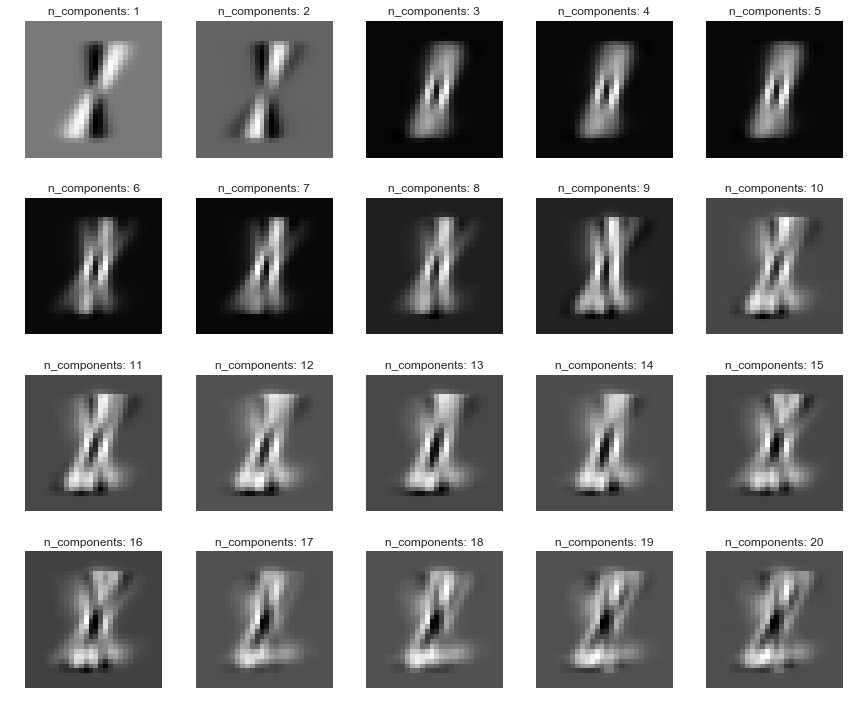

In [13]:
#plot the reconstruction part
plt.figure(figsize=(12,10))
for i in range(n):
    plt.subplot(4, 5, i+1)
    plt.imshow(reconstructions[i].real.reshape((28, 28)).T, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
# #perform LDA
# np.set_printoptions(precision=784)
# mean_vectors = []
# for i in range(0,2):
#     mean_vectors.append(np.mean(X_0_1[y_0_1==i],axis=0))
# mean_vectors = np.matrix(mean_vectors)
# mean_vectors.shape
# X_data_0_1=X_0_1.values


In [15]:
# #withclass
# y_0_1=np.array(y_0_1)
# S_W = np.zeros((784,784))
# for i in range(0,2):
#     temp=np.zeros((784,784))
#     for row in X_data_0_1[y_0_1==i]:
#         temp+=(row-mean_vectors[i-1]).T.dot((row-mean_vectors[i-1]))
#     S_W+=temp
# print('within-class Scatter Matrix:\n', S_W)

('within-class Scatter Matrix:\n', array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))


In [16]:
# overall_mean_0_1 = np.mean(X_data_0_1, axis=0)
# overall_mean_0_1 = np.array(overall_mean_0_1)
# S_B=np.zeros((784,784))
# for i in range(0,2):
#     n = X_data_0_1[y_0_1==i].shape[0]
#     S_B+=n*(mean_vectors[i-1]-overall_mean_0_1).T.dot((mean_vectors[i-1]-overall_mean_0_1))


In [306]:
# eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# for i in range(len(eig_vals)):
#     eigvec_sc = eig_vecs[:,i].reshape(784,1)   
#     print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
#     print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

In [260]:
#
import math
import random
mean_vectors = []
X_train_0_1=X_data_0_1
y_train_0_1=y_0_1
for cl in range(0,2):
    mean_vectors.append(np.mean(X_train_0_1[y_train_0_1.values==cl], axis=0))
variance = np.var(X_train_0_1, axis=0)
index=[]
for i in range(0,len(variance)):
    if variance[i]>0.2:
        index.append(i)
        
len(index)

17

In [261]:
w0 = math.log(1)
w1_vectors = []
for i in index:
    w0 = w0 + (mean_vectors[0][i] * mean_vectors[0][i] - mean_vectors[1][i] * mean_vectors[1][i]) / (2*variance[i])
    w1_vectors.append((mean_vectors[0][i] - mean_vectors[1][i]) / variance[i])
w0

-15.277501182634266

In [262]:
temp=X_0_1_test.ix[:,index]
X_0_1_testindex=temp.values
math.exp(w0+X_0_1_testindex[2].dot(w1_vectors))


7.925814844909769e-05

In [263]:
pc1x0_1=[]
for i in X_0_1_testindex:
    posterior=math.exp(-w0+i.dot(w1_vectors))/(1+math.exp(-w0+i.dot(w1_vectors)))
    if posterior>0.5:
        posterior=0
    else:
        posterior=1
    pc1x0_1.append(posterior)
pc1x0_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [266]:
from sklearn.metrics import confusion_matrix
# num=0
# for i in range(X_0_1_test.shape[0]):
#     if pc1x0_1[i]==y_0_1_test[i]:
#         num+=1
# print num
# accurarcy=float(num)/X_0_1_test.shape[0]
# print accurarcy


# #perform the confusion matrix:
# numcon1=0
# numcon2=0
# for i in range(X_0_1_test.shape[0]):
#     if pc1x0_1[i]!=y_0_1_test[i]:
#         if y_0_1_test[i]==1:
#             numcon1+=1
#         else:
#             numcon2+=1
            
# print numcon1,numcon2
# confusion=np.matrix([[X_0_1_test[y_0_1_test==0].shape[0]-numcon1, numcon1], [numcon2,X_0_1_test[y_0_1_test==1].shape[0]-numcon2]])
# print 'The confusion matrix is:\n',confusion

accuracy = confusion_matrix
accuracy = confusion_matrix(y_0_1_test,pc1x0_1)
print(accuracy)

[[ 975    5]
 [   9 1126]]


In [267]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [182]:
# temp1=confusion[0]/float(X_0_1_test[y_0_1_test==0].shape[0])
# temp2=confusion[1]/float(X_0_1_test[y_0_1_test==1].shape[0])
# confusion_norm= np.stack((temp1, temp2))

Confusion matrix, without normalization
[[ 975    5]
 [   9 1126]]
Confusion matrix, without normalization
[[ 975    5]
 [   9 1126]]


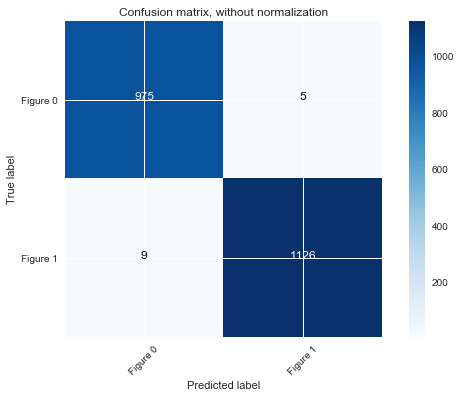

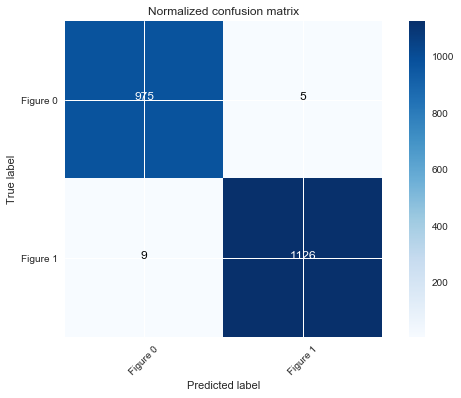

In [268]:
labels = ['Figure 0', 'Figure 1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels,
                      title='Normalized confusion matrix')

plt.show()

In [269]:
import math
import random
mean_vectors = []
X_data_3_5=X_3_5.values
X_train_3_5=X_data_3_5
y_train_3_5=y_3_5.values

for cl in [3,5]:
    mean_vectors.append(np.mean(X_train_3_5[y_train_3_5==cl], axis=0))
variance = np.var(X_train_3_5, axis=0)
index=[]
for i in range(0,len(variance)):
    if variance[i]>0.1:
        index.append(i)
len(index)

248

In [270]:
w0 = math.log(1)
w1_vectors = []
for i in index:
    w0 = w0 + (mean_vectors[0][i] * mean_vectors[0][i] - mean_vectors[1][i] * mean_vectors[1][i]) / (2*variance[i])
    w1_vectors.append((mean_vectors[0][i] - mean_vectors[1][i]) / variance[i])
w0

34.322957132609631

In [271]:
temp=X_3_5_test.ix[:,index]
X_3_5_testindex=temp.values
math.exp(w0+X_3_5_testindex[2].dot(w1_vectors))

1.4545697133063207e+40

In [273]:
pc1x3_5=[]

for i in X_3_5_testindex:
    posterior=math.exp(-w0+i.dot(w1_vectors))/(1+math.exp(-w0+i.dot(w1_vectors)))
    if posterior>0.5:
        posterior=3
        
    else:
        posterior=5
    pc1x3_5.append(posterior)
y_3_5_test=y_3_5_test.values

array([ 3.,  3.,  3., ...,  5.,  5.,  5.])

In [274]:
# num=0
# for i in range(X_3_5_test.shape[0]):
#     if pc1x3_5[i]==y_3_5_test[i]:
#         num+=1
# print num
# accurarcy=float(num)/X_3_5_test.shape[0]
# print accurarcy

# #perform the confusion matrix:
# numcon1=0
# numcon2=0
# for i in range(X_3_5_test.shape[0]):
#     if pc1x3_5[i]!=y_3_5_test[i]:
#         if y_3_5_test[i]==5:
#             numcon1+=1
#         else:
#             numcon2+=1
            
# print numcon1,numcon2
# confusion=np.matrix([[X_3_5_test[y_3_5_test==3].shape[0]-numcon1, numcon1], [numcon2,X_3_5_test[y_3_5_test==5].shape[0]-numcon2]])
# print 'The confusion matrix is:\n',confusion

accuracy = confusion_matrix(y_3_5_test,pc1x3_5)
print(accuracy)

[[900 110]
 [122 770]]


In [231]:
# temp1=confusion[0]/float(X_3_5_test[y_3_5_test==3].shape[0])
# temp2=confusion[1]/float(X_3_5_test[y_3_5_test==5].shape[0])
# confusion_norm= np.stack((temp1, temp2))

Confusion matrix, without normalization
[[900 110]
 [122 770]]
Confusion matrix, without normalization
[[900 110]
 [122 770]]


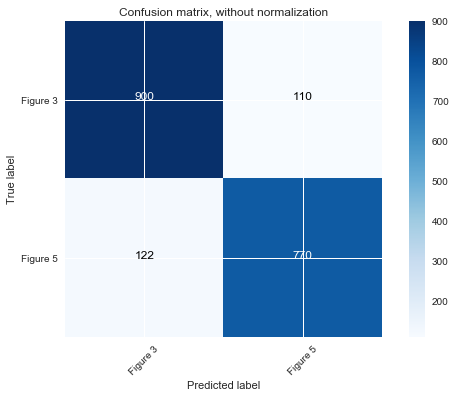

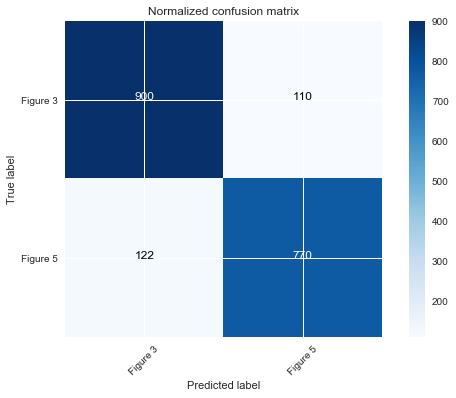

In [277]:
labels = ['Figure 3', 'Figure 5']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels,
                      title='Normalized confusion matrix')

plt.show()

In [301]:
###########
#cross validation

X_random=mnist_train_0_1_df.reindex(np.random.permutation(mnist_train_0_1_df.index))
num_folds=10
X_random_X=X_random.ix[:,:784]
X_random_y=X_random['Class']

X_train_folds = np.array(np.array_split(X_random_X.values, 10))
y_train_folds = np.array(np.array_split(X_random_y.values, 10))
for n in range(0,num_folds):
    temp= [x for x in range(0,num_folds) if x != n]
    X_train_dat=np.concatenate(X_train_folds[temp])
    y_train_dat=np.concatenate(y_train_folds[temp])
    X_test=X_train_folds[n]
    y_test=y_train_folds[n]
    mean_vectors = []
    for cl in range(0,2):
        
        mean_vectors.append(np.mean(X_train_dat[y_train_dat==cl], axis=0))
    variance = np.var(X_train_dat, axis=0)
    #
    index=[]
    for i in range(0,len(variance)):
        if variance[i]>0.1:
            index.append(i)
        
    w0 = math.log(1)
    w1_vectors = []
    for i in index:
        w0 = w0 + (mean_vectors[0][i] * mean_vectors[0][i] - mean_vectors[1][i] * mean_vectors[1][i]) / (2*variance[i])
        w1_vectors.append((mean_vectors[0][i] - mean_vectors[1][i]) / variance[i])
    ###
    temp=X_test[:,index]
    X_0_1_testindex=temp
    

    pc1x=[]
    for i in X_0_1_testindex:
        posterior=math.exp(-w0+i.dot(w1_vectors))/(1+math.exp(-w0+i.dot(w1_vectors)))
        if posterior>0.5:
            posterior=0
        else:
            posterior=1
        pc1x.append(posterior)
    num=0
    for i in range(X_test.shape[0]):
        if pc1x[i]==y_test[i]:
            num+=1
    #print num
    accurarcy=float(num)/X_test.shape[0]
    print 'The accuracy is:\n',accurarcy
    accuracy = confusion_matrix(y_test,pc1x)
    print(accuracy)
    


#     #perform the confusion matrix:
#     numcon1=0
#     numcon2=0
#     for i in range(X_test.shape[0]):
#         if pc1x[i]!=y_test[i]:
#             if y_test[i]==1:
#                 numcon1+=1
#             else:
#                 numcon2+=1

#     print numcon1,numcon2
#     confusion=np.matrix([[X_test[y_test==0].shape[0]-numcon1, numcon1], [numcon2,X_test[y_test==1].shape[0]-numcon2]])
#     print 'The confusion matrix is:\n',confusion


The accuracy is:
0.98816101026
[[565  13]
 [  2 687]]
The accuracy is:
0.988950276243
[[577  14]
 [  0 676]]
The accuracy is:
0.989739542226
[[557  12]
 [  1 697]]
The accuracy is:
0.989739542226
[[602  13]
 [  0 652]]
The accuracy is:
0.988950276243
[[558  14]
 [  0 695]]
The accuracy is:
0.993680884676
[[593   8]
 [  0 665]]
The accuracy is:
0.992890995261
[[576   8]
 [  1 681]]
The accuracy is:
0.990521327014
[[593  11]
 [  1 661]]
The accuracy is:
0.99131121643
[[607  11]
 [  0 648]]
The accuracy is:
0.987361769352
[[576  15]
 [  1 674]]


In [302]:
#cross validation
X_random=mnist_train_3_5_df.reindex(np.random.permutation(mnist_train_3_5_df.index))
num_folds=10
X_random_X=X_random.ix[:,:784]
X_random_y=X_random['Class']

num_folds=10
X_train_folds = np.array(np.array_split(X_random_X.values, 10))
y_train_folds = np.array(np.array_split(X_random_y.values, 10))
for n in range(0,num_folds):
    temp= [x for x in range(0,num_folds) if x != n]
    X_train_dat=np.concatenate(X_train_folds[temp])
    y_train_dat=np.concatenate(y_train_folds[temp])
    X_test=X_train_folds[n]
    y_test=y_train_folds[n]
    mean_vectors = []
    for cl in [3,5]:
        
        mean_vectors.append(np.mean(X_train_dat[y_train_dat==cl], axis=0))
    variance = np.var(X_train_dat, axis=0)
    #
    index=[]
    for i in range(0,len(variance)):
        if variance[i]>0.1:
            index.append(i)
        
    w0 = math.log(1)
    w1_vectors = []
    for i in index:
        w0 = w0 + (mean_vectors[0][i] * mean_vectors[0][i] - mean_vectors[1][i] * mean_vectors[1][i]) / (2*variance[i])
        w1_vectors.append((mean_vectors[0][i] - mean_vectors[1][i]) / variance[i])
    ###
    temp=X_test[:,index]
    X_3_5_testindex=temp
    

    pc1x=[]
    for i in X_3_5_testindex:
        posterior=math.exp(-w0+i.dot(w1_vectors))/(1+math.exp(-w0+i.dot(w1_vectors)))
        if posterior>0.5:
            posterior=3
        else:
            posterior=5
        pc1x.append(posterior)
    num=0
    for i in range(X_test.shape[0]):
        if pc1x[i]==y_test[i]:
            num+=1
    #print num
    accurarcy=float(num)/X_test.shape[0]
    print 'The accuracy is:\n',accurarcy
    
    accuracy = confusion_matrix(y_test,pc1x)
    print(accuracy)
    
    
    
    


#     #perform the confusion matrix:
#     numcon1=0
#     numcon2=0
#     for i in range(X_test.shape[0]):
#         if pc1x[i]!=y_test[i]:
#             if y_test[i]==5:
#                 numcon1+=1
#             else:
#                 numcon2+=1

#     #print numcon1,numcon2
#     confusion=np.matrix([[X_test[y_test==3].shape[0]-numcon1, numcon1], [numcon2,X_test[y_test==5].shape[0]-numcon2]])
#     print 'The confusion matrix is:\n',confusion

The accuracy is:
0.867647058824
[[537  71]
 [ 82 466]]
The accuracy is:
0.852076124567
[[540  85]
 [ 86 445]]
The accuracy is:
0.861471861472
[[532  92]
 [ 68 463]]
The accuracy is:
0.858874458874
[[548  79]
 [ 84 444]]
The accuracy is:
0.862337662338
[[562  79]
 [ 80 434]]
The accuracy is:
0.881385281385
[[526  79]
 [ 58 492]]
The accuracy is:
0.87619047619
[[527  72]
 [ 71 485]]
The accuracy is:
0.851948051948
[[513  83]
 [ 88 471]]
The accuracy is:
0.867532467532
[[530  75]
 [ 78 472]]
The accuracy is:
0.861471861472
[[521  80]
 [ 80 474]]
